In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

In [2]:
df=pd.read_excel('G:/DATA SCIENCE BOOKS/hands-on-time-series-analylsis-python-master/Data/India_Exchange_Rate_Dataset.xls',
                 index_col=0, parse_dates=True)

In [3]:
df

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927
...,...
2019-07-01,68.7391
2019-08-01,71.1891
2019-09-01,71.3110


# TREND

DETERMINANDO SE LA SERIE TIENE TENDENCIA O NO.

In [5]:
Exinus_cycle, Exinus_trend=hpfilter(df['EXINUS'], lamb=1600)

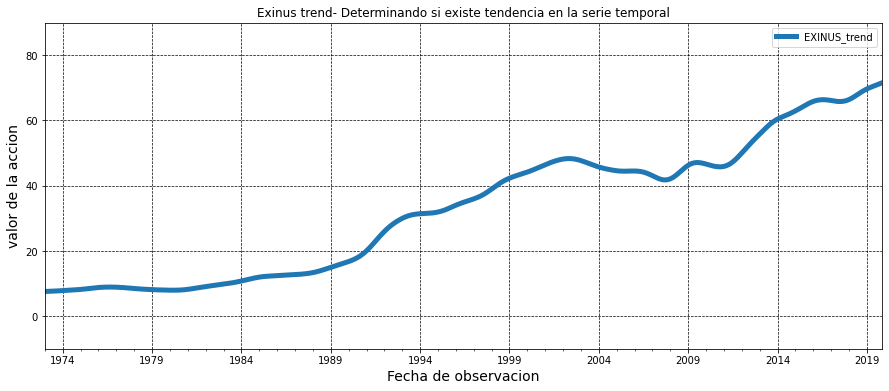

In [37]:
Exinus_trend.plot(figsize=(15,6), linestyle='-', linewidth=5)
plt.legend(loc='best')
plt.title('Exinus trend- Determinando si existe tendencia en la serie temporal')
plt.ylim(-10,90)
plt.xlabel('Fecha de observacion', fontsize=14)
plt.ylabel('valor de la accion', fontsize=14)
plt.grid(color='black',linewidth=0.7, linestyle='dashed')
plt.savefig('G:/Salida_ejercicios_series_temporales/tendencia.jpg')

DETRENDING USING PANDAS DIFFERENCING

In [39]:
df=pd.read_excel('G:/DATA SCIENCE BOOKS/hands-on-time-series-analylsis-python-master/Data/India_Exchange_Rate_Dataset.xls',
                 index_col=0, parse_dates=True)

In [40]:
import warnings

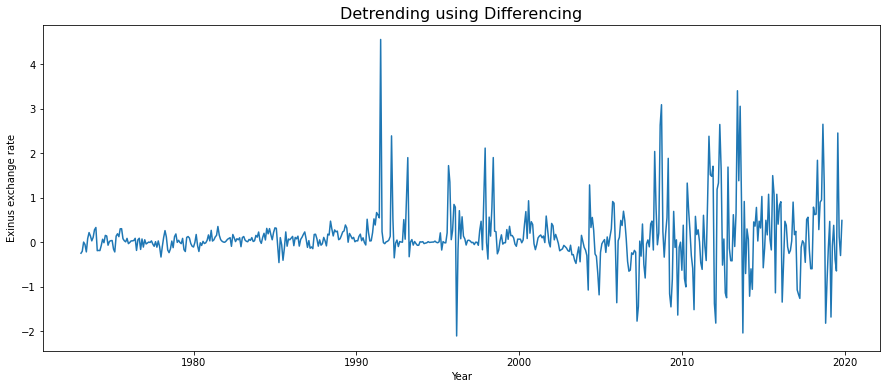

In [41]:
diff=df['EXINUS'].diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Exinus exchange rate')
plt.show()

DETRENDING USANDO SciPy Signal

In [42]:
from scipy import signal

In [43]:
df=pd.read_excel('G:/DATA SCIENCE BOOKS/hands-on-time-series-analylsis-python-master/Data/India_Exchange_Rate_Dataset.xls',
                 index_col=0, parse_dates=True)

In [44]:
warnings.filterwarnings("ignore")

In [45]:
detrened=signal.detrend(df['EXINUS'].values)

<function matplotlib.pyplot.show(close=None, block=None)>

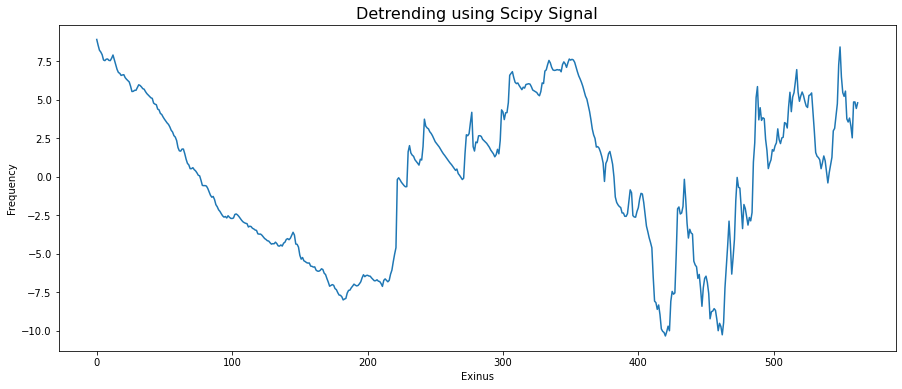

In [46]:
plt.figure(figsize=(15,6))
plt.plot(detrened)
plt.xlabel('Exinus')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show

DETRENDING USANDO HP Filter


In [47]:
df['trend']=Exinus_trend

In [48]:
detrened=df['EXINUS']-df['trend']

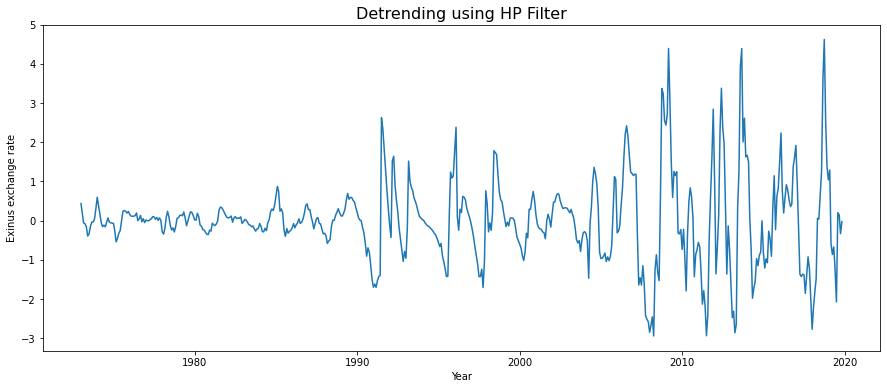

In [49]:
plt.figure(figsize=(15,6))
plt.plot(detrened)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Exinus exchange rate')
plt.show()

# SEASONALITY

DETECTANDO SEASONALITY

DETECTANDO SEASONALIDAD CON BOX PLOT